In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 定义图的节点数量和不同平均度
num_nodes = 10000
average_degrees = [1.4, 1.6, 1.9, 2.6]
num_runs = 200  # 每个平均度下执行的次数

# 计算连通图比例
def calculate_connected_ratio(graph):
    if graph.number_of_nodes() == 0:
        return 0
    connected_components = list(nx.connected_components(graph))
    largest_connected_component_size = max(len(comp) for comp in connected_components)
    ratio = largest_connected_component_size / num_nodes
    return ratio

# 移除节点并计算平均最大连通比
removal_ratios = np.linspace(0, 1, num=50)

average_connected_ratios_by_degree = {}  # 存储不同平均度的连通比例数据

for avg_degree in average_degrees:
    average_connected_ratios = []

    for _ in range(num_runs):
        connected_ratios = []

        for ratio in removal_ratios:
            degree_sequence = np.random.poisson(avg_degree, num_nodes)
            if sum(degree_sequence) % 2 != 0:
                degree_sequence[np.random.randint(num_nodes)] += 1
            G = nx.configuration_model(degree_sequence)
            G = nx.Graph(G)

            if ratio == 1:
                connected_ratio = 0
            else:
                nodes_to_remove = int(ratio * num_nodes)
                nodes_to_remove = min(nodes_to_remove, G.number_of_nodes() - 1)
                nodes_removed = np.random.choice(list(G.nodes()), size=nodes_to_remove, replace=False)
                G_removed = G.copy()
                G_removed.remove_nodes_from(nodes_removed)
                connected_ratio = calculate_connected_ratio(G_removed)

            connected_ratios.append(connected_ratio)

        average_connected_ratios.append(connected_ratios)

    avg_connected_ratios = np.mean(average_connected_ratios, axis=0)
    average_connected_ratios_by_degree[avg_degree] = avg_connected_ratios

# 组织最终保存的数据
data = {
    "removal_ratios": removal_ratios,
    "connected_ratios_by_degree": average_connected_ratios_by_degree
}

np.save("/content/drive/MyDrive/Graph/removal_distribution/graph_data_poisson_new.npy", data)
print("Data saved successfully.")


Data saved successfully.


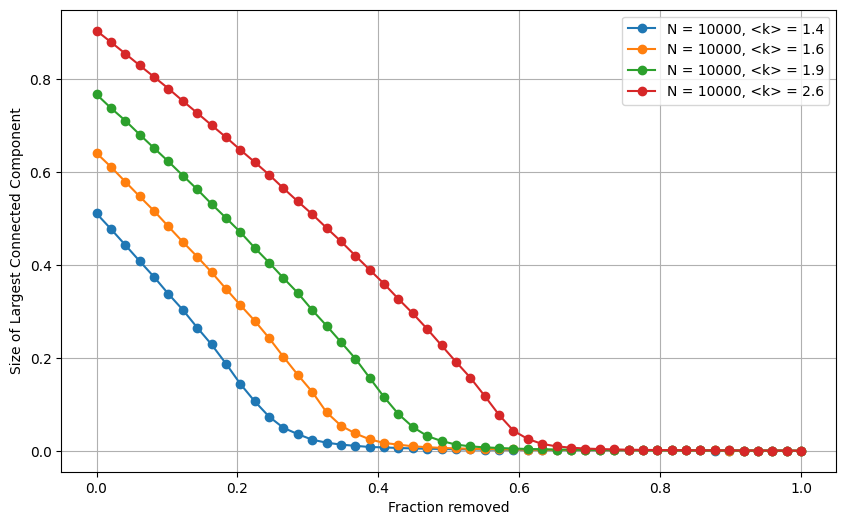

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the saved .npy file
data = np.load("/content/drive/MyDrive/Graph/removal_distribution/graph_data_poisson_new.npy", allow_pickle=True).item()

removal_ratios = data["removal_ratios"]
connected_ratios_by_degree = data["connected_ratios_by_degree"]

plt.figure(figsize=(10, 6))

for avg_degree, avg_connected_ratios in connected_ratios_by_degree.items():
    label = f'N = 10000, <k> = {avg_degree}'
    plt.plot(removal_ratios, avg_connected_ratios, marker='o', label=label)

plt.xlabel("Fraction removed")
plt.ylabel("Size of Largest Connected Component")
#plt.title("Largest Connected Component Fraction vs. Removal Ratio for Different Average Degrees")
plt.legend()
plt.grid(True)
plt.show()


Data saved successfully.


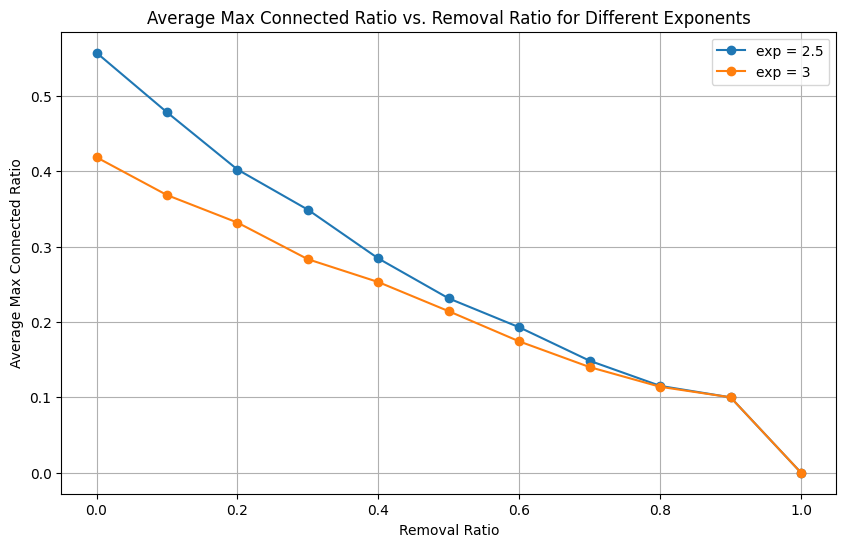

In [272]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 定义图的节点数量和不同指数的幂律分布
num_nodes = 100
exponents = [2.5, 3]
num_runs = 10  # 每个指数下执行的次数

# 计算连通图比例
def calculate_connected_ratio(graph):
    if graph.number_of_nodes() == 0:
        return 0
    connected_components = list(nx.connected_components(graph))
    largest_connected_component_size = max(len(comp) for comp in connected_components)
    ratio = largest_connected_component_size / num_nodes
    return ratio

# 移除节点并计算平均最大连通比
removal_ratios = np.linspace(0, 1, num=11)  # 生成0到1之间的50个等间隔数

plt.figure(figsize=(10, 6))  # 设置绘图的大小

for exponent in exponents:
    average_connected_ratios = []

    for _ in range(num_runs):
        connected_ratios = []

        for ratio in removal_ratios:
            # 使用幂律分布生成度序列
            degree_sequence = np.random.zipf(exponent, num_nodes)
            while sum(degree_sequence) % 2 != 0:
                degree_sequence[np.random.randint(num_nodes)] += 1  # 缩放使总和为偶数
            G = nx.configuration_model(degree_sequence)
            G = nx.Graph(G)

            if ratio == 1:
                connected_ratio = 0
            else:
                nodes_to_remove = int(ratio * num_nodes)
                nodes_to_remove = min(nodes_to_remove, G.number_of_nodes() - 1)
                nodes_removed = np.random.choice(list(G.nodes()), size=nodes_to_remove, replace=False)
                G_removed = G.copy()
                G_removed.remove_nodes_from(nodes_removed)
                connected_ratio = calculate_connected_ratio(G_removed)

            connected_ratios.append(connected_ratio)

        average_connected_ratios.append(connected_ratios)

    # 计算平均最大连通比
    avg_connected_ratios = np.mean(average_connected_ratios, axis=0)

    # 绘制线条
    label = f'exp = {exponent}'
    plt.plot(removal_ratios, avg_connected_ratios, marker='o', label=label)

data = {
    "exponents": exponents,
    "num_runs": num_runs,
    "removal_ratios": removal_ratios,
    "average_connected_ratios": average_connected_ratios
}

np.save("graph_data_powerlaw.npy", data)
print("Data saved successfully.")

plt.xlabel("Removal Ratio")
plt.ylabel("Average Max Connected Ratio")
plt.title("Average Max Connected Ratio vs. Removal Ratio for Different Exponents")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 定义图的节点数量和不同指数的幂律分布
num_nodes = 100
exponents = [2.5, 3]
num_runs = 10  # 每个指数下执行的次数

# 计算连通图比例
def calculate_connected_ratio(graph):
    if graph.number_of_nodes() == 0:
        return 0
    connected_components = list(nx.connected_components(graph))
    largest_connected_component_size = max(len(comp) for comp in connected_components)
    ratio = largest_connected_component_size / num_nodes
    return ratio

# 移除节点并计算平均最大连通比
removal_ratios = np.linspace(0, 1, num=11)

plt.figure(figsize=(10, 6))

average_connected_ratios_by_exponent = {}  # 存储不同指数的连通比例数据

for exponent in exponents:
    average_connected_ratios = []

    for _ in range(num_runs):
        connected_ratios = []

        for ratio in removal_ratios:
            # 使用幂律分布生成度序列
            degree_sequence = np.random.zipf(exponent, num_nodes)
            while sum(degree_sequence) % 2 != 0:
                degree_sequence[np.random.randint(num_nodes)] += 1  # 缩放使总和为偶数
            G = nx.configuration_model(degree_sequence)
            G = nx.Graph(G)

            if ratio == 1:
                connected_ratio = 0
            else:
                nodes_to_remove = int(ratio * num_nodes)
                nodes_to_remove = min(nodes_to_remove, G.number_of_nodes() - 1)
                nodes_removed = np.random.choice(list(G.nodes()), size=nodes_to_remove, replace=False)
                G_removed = G.copy()
                G_removed.remove_nodes_from(nodes_removed)
                connected_ratio = calculate_connected_ratio(G_removed)

            connected_ratios.append(connected_ratio)

        average_connected_ratios.append(connected_ratios)

    avg_connected_ratios = np.mean(average_connected_ratios, axis=0)
    average_connected_ratios_by_exponent[exponent] = avg_connected_ratios

# 组织最终保存的数据
data = {
    "removal_ratios": removal_ratios,
    "connected_ratios_by_exponent": average_connected_ratios_by_exponent
}

np.save("/content/drive/MyDrive/Graph/removal_distribution/graph_data_powerlaw_new.npy", data)
print("Data saved successfully.")


Data saved successfully.


<Figure size 1000x600 with 0 Axes>

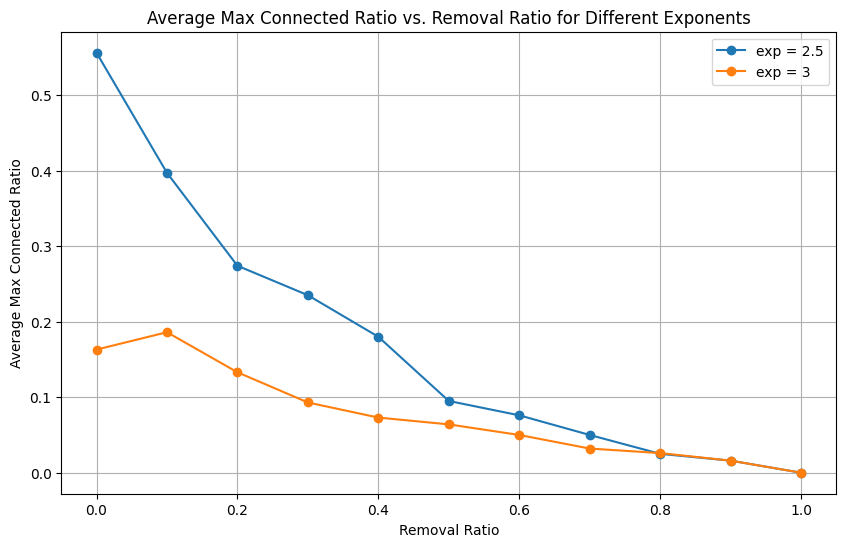

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the saved .npy file
data = np.load("/content/drive/MyDrive/Graph/removal_distribution/graph_data_powerlaw_new.npy", allow_pickle=True).item()

removal_ratios = data["removal_ratios"]
connected_ratios_by_exponent = data["connected_ratios_by_exponent"]

plt.figure(figsize=(10, 6))

for exponent, avg_connected_ratios in connected_ratios_by_exponent.items():
    label = f'exp = {exponent}'
    plt.plot(removal_ratios, avg_connected_ratios, marker='o', label=label)

plt.xlabel("Removal Ratio")
plt.ylabel("Average Max Connected Ratio")
plt.title("Average Max Connected Ratio vs. Removal Ratio for Different Exponents")
plt.legend()
plt.grid(True)
plt.show()


Number of nodes: 10
Number of edges: 14
Average degree: 2.8


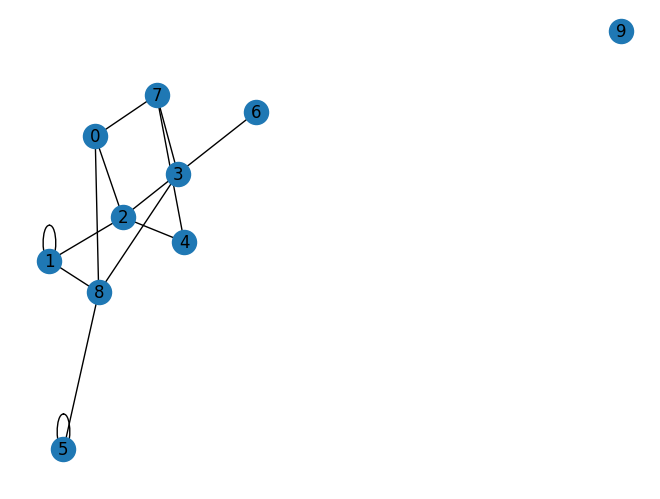

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 定义图的节点数量和平均度
num_nodes = 10
average_degree = 3

# 使用泊松分布生成度序列
degree_sequence = np.random.poisson(average_degree, num_nodes)

# 确保度序列的总和是偶数（无向图的度必须是偶数）
if sum(degree_sequence) % 2 != 0:
    degree_sequence[np.random.randint(num_nodes)] += 1

# 创建图
G = nx.configuration_model(degree_sequence)

# 去除重复边和自环
G = nx.Graph(G)

# 打印图的基本信息
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())

# 绘制图
nx.draw(G, with_labels=True)
plt.show()


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 定义图的节点数量和平均度
num_nodes = 10
average_degree = 7

while 1:
# 使用泊松分布生成度序列
  degree_sequence = np.random.poisson(average_degree, num_nodes)
# 将度数限制在最大节点数的一半以下，以避免自环
  max_degree = num_nodes // 2
  degree_sequence = np.minimum(degree_sequence, max_degree)

# 将度序列转换为偶数
  degree_sequence = np.where(degree_sequence % 2 == 0, degree_sequence, degree_sequence + 1)
  avg_dregee = sum(dict(G.degree()).values()) / G.number_of_nodes()
  print("Average degree:", avg_dregee)

  print(degree_sequence)


# 创建图
G = nx.configuration_model(degree_sequence)

# 打印邻接矩阵
adjacency_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:")
print(adjacency_matrix)

# 绘制图
nx.draw(G, with_labels=True)
plt.show()


# 去除重复边和自环
G = nx.Graph(G)

# 打印图的基本信息
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())

# 打印邻接矩阵
adjacency_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:")
print(adjacency_matrix)

# 绘制图
nx.draw(G, with_labels=True)
plt.show()


3.0
Adjacency Matrix:
[[0 0 1 0 0 0 0 0 1 1]
 [0 0 1 1 0 0 1 0 0 0]
 [1 1 0 0 1 1 0 0 1 0]
 [0 1 0 0 0 1 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 1]
 [0 0 1 1 0 0 1 0 0 0]
 [0 1 0 1 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]]


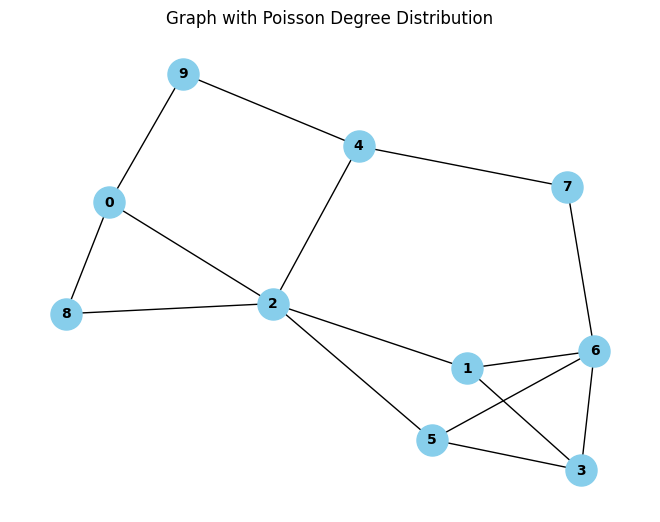

In [247]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 预定义的平均度
target_avg_degree = 3

while True:
    # 创建一个空的图
    G = nx.Graph()

    # 总共的节点数
    num_nodes = 10

    # 添加节点
    nodes = list(range(num_nodes))
    G.add_nodes_from(nodes)

    # 添加边，避免重复边和自环
    for node in nodes:
        # 根据泊松分布生成该节点的度
        avg_degree = np.random.poisson(target_avg_degree)
        while avg_degree >= num_nodes - 1 or avg_degree == 0:
            avg_degree = np.random.poisson(target_avg_degree)

        neighbors = list(G.neighbors(node))
        while G.degree(node) < avg_degree:
            target = np.random.choice(nodes)
            if target != node and target not in neighbors:
                G.add_edge(node, target)

    # 计算实际平均度
    actual_avg_degree = sum(dict(G.degree()).values()) / num_nodes

    # 判断平均度是否满足要求
    if abs(actual_avg_degree - target_avg_degree) <= 0.01 * target_avg_degree:
        break

# 打印邻接矩阵
adj_matrix = nx.adjacency_matrix(G).toarray()
print(np.sum(adj_matrix)/10)
print("Adjacency Matrix:")
print(adj_matrix)

# 绘制图像
pos = nx.spring_layout(G)  # 使用Spring Layout布局
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.title("Graph with Poisson Degree Distribution")
plt.show()


In [224]:
import networkx as nx
import numpy as np

# 预定义的平均度
target_avg_degree = 3

# 重复运行的次数
num_repeats = 100

# 存储邻接矩阵的列表
adj_matrix_list = []

for _ in range(num_repeats):
    while True:
        # 创建一个空的图
        G = nx.Graph()

        # 总共的节点数
        num_nodes = 10

        # 添加节点
        nodes = list(range(num_nodes))
        G.add_nodes_from(nodes)

        # 添加边，避免重复边和自环
        for node in nodes:
            # 根据泊松分布生成该节点的度
            avg_degree = np.random.poisson(target_avg_degree)
            while avg_degree >= num_nodes - 1 or avg_degree == 0:
                avg_degree = np.random.poisson(target_avg_degree)

            neighbors = list(G.neighbors(node))
            while G.degree(node) < avg_degree:
                target = np.random.choice(nodes)
                if target != node and target not in neighbors:
                    G.add_edge(node, target)

        # 计算实际平均度
        actual_avg_degree = sum(dict(G.degree()).values()) / num_nodes

        # 判断平均度是否满足要求
        if abs(actual_avg_degree - target_avg_degree) <= 0.01 * target_avg_degree:
            break

    # 添加邻接矩阵数据到列表中
    adj_matrix = nx.adjacency_matrix(G).toarray()
    adj_matrix_list.append(adj_matrix)

# 将邻接矩阵数据保存为单个npy文件
adj_matrix_array = np.array(adj_matrix_list)
np.save("adj_matrices.npy", adj_matrix_array)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
# 加载邻接矩阵数据
adj_matrix_array = np.load("/content/drive/MyDrive/Graph/adj_matrices_poisson.npy")

# 存储最终的连通子图结果
final_residuals = []

for selected_matrix in adj_matrix_array:
    # 创建图对象
    G = nx.Graph(selected_matrix)

    # 随机选择3个点消去并删除相应的边
    nodes = list(G.nodes())
    nodes_to_remove = random.sample(nodes, k=3)
    for node in nodes_to_remove:
        G.remove_node(node)

    # 获取剩下的连通子图
    subgraphs = list(nx.connected_components(G))

    # 添加当前图的剩余连通子图结果到最终结果列表
    final_residuals.append(subgraphs)

# 输出最终的连通子图结果
for i, residual in enumerate(final_residuals):
    print(f"Graph {i + 1} Residuals: {residual}")



3.0
3.0
Adjacency Matrix:
[[0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 0 1 1 1]
 [0 1 0 1 1 0 1 0 0 1]
 [0 1 1 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0]]


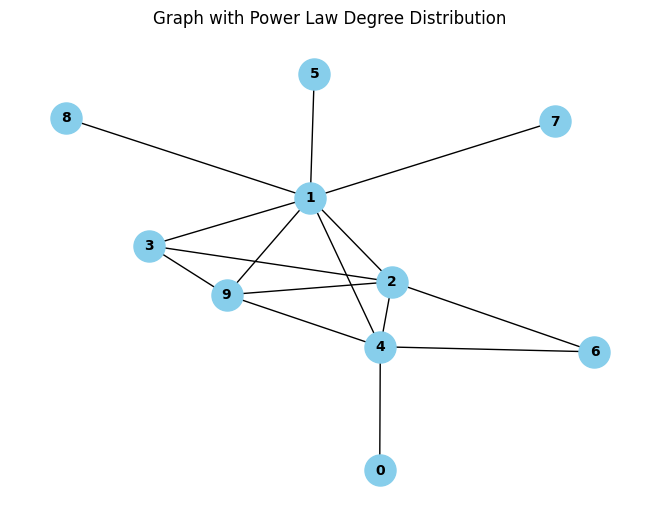

In [214]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 预定义的幂律分布的指数和平均度
target_exp = 2.5
target_d = 3

while True:
    try:
        # 创建一个空的图
        G = nx.Graph()

        # 总共的节点数
        num_nodes = 10

        # 添加节点
        nodes = list(range(num_nodes))
        G.add_nodes_from(nodes)

        # 随机选择节点，并生成度序列
        for node in nodes:
            selected_nodes = np.random.choice(nodes, size=int(np.random.pareto(target_exp)) + 1, replace=False)
            for target in selected_nodes:
                if target != node and not G.has_edge(node, target):
                    G.add_edge(node, target)

        # 计算实际的平均度
        actual_avg_degree = sum(dict(G.degree()).values()) / num_nodes

        # 判断平均度是否满足要求
        if abs(actual_avg_degree - target_d) <= 0.01 * target_d:
            print(actual_avg_degree)
            break

    except ValueError as e:
        if "Cannot take a larger sample than population when 'replace=False'" in str(e):
            continue
        else:
            raise e

# 打印邻接矩阵
adj_matrix = nx.adjacency_matrix(G).toarray()
print(np.sum(adj_matrix) / num_nodes)
print("Adjacency Matrix:")
print(adj_matrix)

# 绘制图像
pos = nx.spring_layout(G)  # 使用Spring Layout布局
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.title("Graph with Power Law Degree Distribution")
plt.show()


In [226]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 预定义的幂律分布的指数和平均度
target_exp = 2.5
target_d = 3

# 存储邻接矩阵的列表
adj_matrix_list = []

# 重复运行的次数
num_repeats = 100

for _ in range(num_repeats):
    while True:
        try:
            # 创建一个空的图
            G = nx.Graph()

            # 总共的节点数
            num_nodes = 10

            # 添加节点
            nodes = list(range(num_nodes))
            G.add_nodes_from(nodes)

            # 随机选择节点，并生成度序列
            for node in nodes:
                selected_nodes = np.random.choice(nodes, size=int(np.random.pareto(target_exp)) + 1, replace=False)
                for target in selected_nodes:
                    if target != node and not G.has_edge(node, target):
                        G.add_edge(node, target)

            # 计算实际的平均度
            actual_avg_degree = sum(dict(G.degree()).values()) / num_nodes

            # 判断平均度是否满足要求
            if abs(actual_avg_degree - target_d) <= 0.01 * target_d:
                break

        except ValueError as e:
            if "Cannot take a larger sample than population when 'replace=False'" in str(e):
                continue
            else:
                raise e

    # 添加邻接矩阵数据到列表中
    adj_matrix = nx.adjacency_matrix(G).toarray()
    adj_matrix_list.append(adj_matrix)

# 将邻接矩阵数据保存为单个npy文件
adj_matrix_array = np.array(adj_matrix_list)
np.save("adj_matrices_powerlaw.npy", adj_matrix_array)


In [1]:
import numpy as np

# 读取保存的邻接矩阵数据
adj_matrix_array = np.load("adj_matrices_powerlaw.npy")

# 遍历每个邻接矩阵并打印度
for i, adj_matrix in enumerate(adj_matrix_array):
    G = nx.Graph(adj_matrix)  # 将邻接矩阵转换为图对象
    degrees = dict(G.degree())  # 获取每个节点的度
    avg_degree = sum(degrees.values()) / len(degrees)
    print(f"Graph {i+1}: Average Degree = {avg_degree:.2f}")

FileNotFoundError: ignored

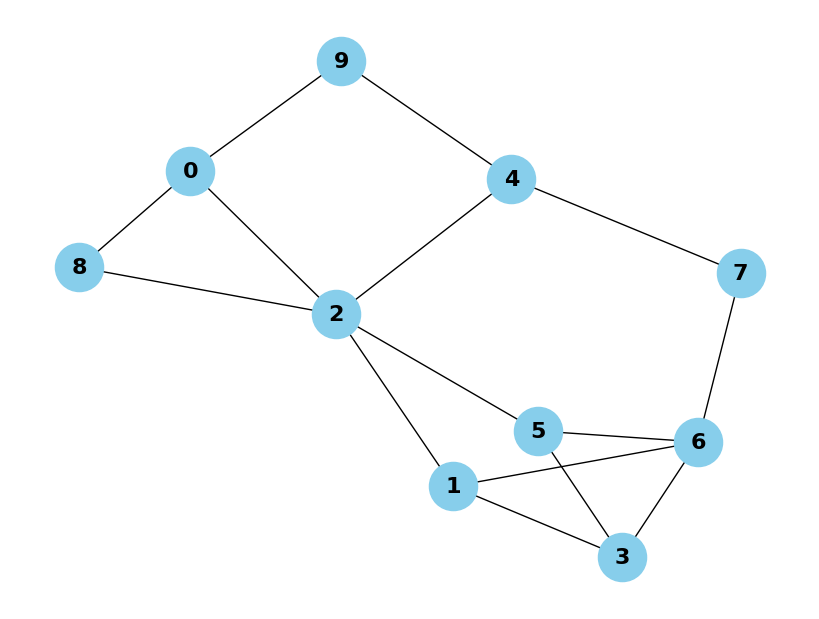

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 给定的邻接矩阵
adj_matrix = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
                       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
                       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0],
                       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
                       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
                       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
                       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

# 创建图对象
G = nx.Graph(adj_matrix)

# 使用Spring Layout布局
pos = nx.spring_layout(G)

# 绘制图像
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=1200, node_color='skyblue', font_size=16, font_color='black', font_weight='bold')
#plt.title("Visualization of Graph from Adjacency Matrix")
plt.show()


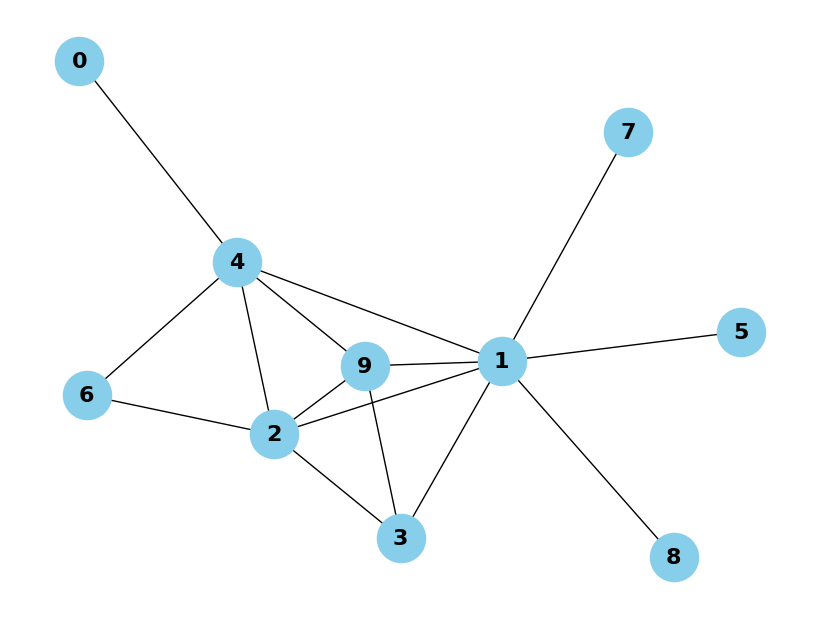

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 给定的邻接矩阵
adj_matrix = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                       [0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
                       [0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
                       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
                       [1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
                       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]])

# 创建图对象
G = nx.Graph(adj_matrix)

# 使用Spring Layout布局
pos = nx.spring_layout(G)

# 绘制图像
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=1200, node_color='skyblue', font_size=16, font_color='black', font_weight='bold')
#plt.title("Visualization of Graph from Adjacency Matrix")
plt.show()
